Does $$f(x) = 1 + \dfrac{\tanh 2 \alpha x}{2}$$ look like a Heaviside step function at $\alpha = 10$?

In [1]:
# Imports and auxiliary function definitions
import numpy as np
import matplotlib.pyplot as plt

def interval(N):
    return np.linspace(-1, 1, N)

In [2]:
# Function Definition
def step(x, alpha):
    return np.ones(np.size(x)) + 0.5 * np.tanh(2 * alpha * x)

Text(0.5, 1.0, 'Seeing the behaviour of our Step Function at various alpha')

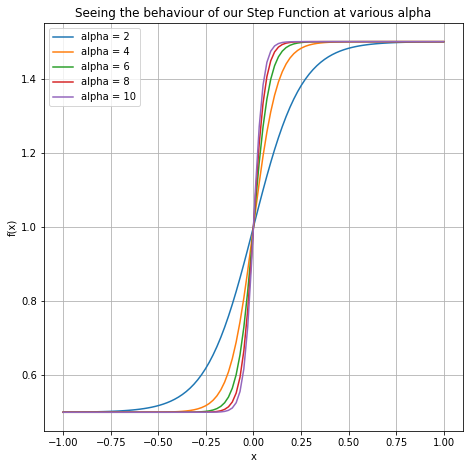

In [3]:
# Plots
x = interval(100)

fig = plt.figure()
fig.set_size_inches(7.5, 7.5)
for alpha in range(2, 11, 2):
    plt.plot(x, step(x, alpha), label='alpha = ' + str(alpha))
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Seeing the behaviour of our Step Function at various alpha')

So, it does seem like, at $\alpha$ = 10, the function approximates a Heaviside Step function quite nicely!

------

### Lagrange's method
  $$p(x) = \sum_{j=1}^{j=N} \left[ y_j \prod_{i=1, \text{ } i\neq j}^{i=N} \left( \dfrac{x - x_i}{x_j - x_i} \right) \right]$$
Defines an approximation which is of order N, and goes through *all* N points. In our case N = 11.

In [4]:
# A function to do Lagrange Interpolation at every point

def linterp(fvals, xvals, x):
    s = 0 # sum
    for j in range(len(fvals)):
        p = 1 # prod
        for i in range(len(xvals)):
            if i != j:
                p *= (x - xvals[i])/(xvals[j] - xvals[i])
        p *= fvals[j]
        s += p
    return s

In [5]:
# Defining the 11 points and (Lagrange) interpolating over them

points = interval(11)
x = interval(100) # this is a reference interval
interpolated_values = np.array([linterp(step(points, 10), points, k) for k in x]) # alpha set to 10

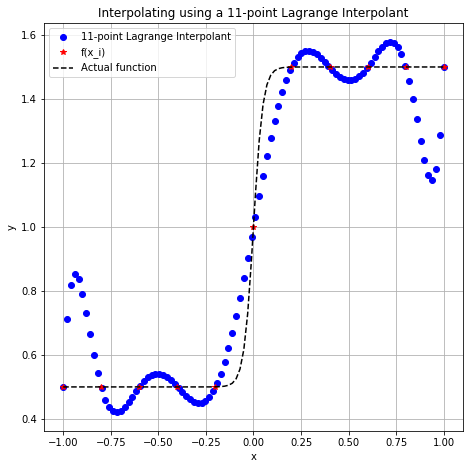

In [6]:
# Plotting the 11-point Lagrange Interpolant

fig = plt.figure()
fig.set_size_inches(7.5, 7.5)
plt.plot(x, interpolated_values, 'bo', label = '11-point Lagrange Interpolant')
plt.plot(points, step(points, 10), 'r*', label = 'f(x_i)')
plt.plot(x, step(x, 10), 'k--', label = 'Actual function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolating using a 11-point Lagrange Interpolant')
plt.legend()
plt.grid(True)

We see that the Lagrange Interpolant is wildly fluctuating near the endpoints, and approximates the original function poorly there(a.k.a *Runge's Phenomena*). Further increasing the number of points used to define the interpolant does improve the behaviour in the other regions (say in $[0.25, 0.75]$ ), but increases the fluctuations at the end-points even more.

---

### Cubic Spline Interpolation (using `scipy.spline`)

In [7]:
# Imports
from scipy.interpolate import interp1d

In [8]:
# Interpolating using Cubic Splines
cubic_interp = interp1d(points, step(points, 10), kind='cubic')
cubic_results = cubic_interp(x)

Text(0.5, 1.0, 'Interpolating using Cubic Splines Interpolant')

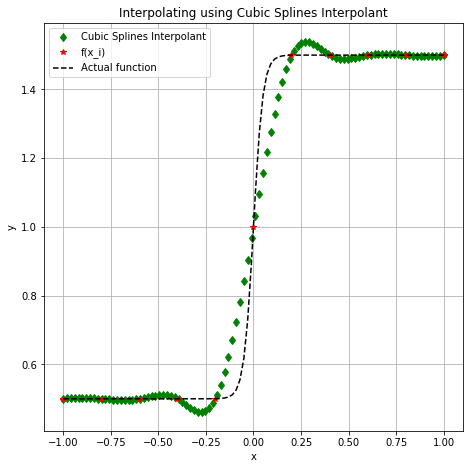

In [9]:
# Plotting the Cubic Splines Interpolant
fig = plt.figure()
fig.set_size_inches(7.5, 7.5)
plt.plot(x, cubic_results, 'gd', label = 'Cubic Splines Interpolant')
plt.plot(points, step(points, 10), 'r*', label = 'f(x_i)')
plt.plot(x, step(x, 10), 'k--', label = 'Actual function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Interpolating using Cubic Splines Interpolant')

As seen from the figure, the Cubic Splines interpolant behaves much more smoothly than the Lagrange Interpolant, and approximates the original function quite nicely throughout the interval. The figure below shows this very fact.

Text(0.5, 1.0, 'Comparison of Cubic Spline and 11-point Lagrange Interpolants')

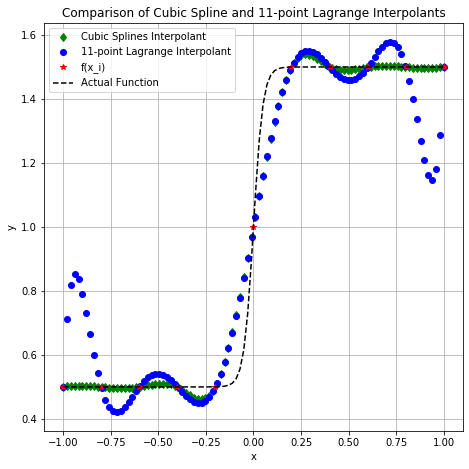

In [10]:
# Comparison of Cubic Spline and Lagrange Interpolants
fig = plt.figure()
fig.set_size_inches(7.5, 7.5)
plt.plot(x, cubic_results, 'gd', label = 'Cubic Splines Interpolant')
plt.plot(x, interpolated_values, 'bo', label = '11-point Lagrange Interpolant')
plt.plot(points, step(points, 10), 'r*', label = 'f(x_i)')
plt.plot(x, step(x, 10), 'k--', label = 'Actual Function')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Cubic Spline and 11-point Lagrange Interpolants')